In [22]:
%matplotlib inline

In [2]:
# IMPORTS
from util import *
from Chapter3 import OutlierDetection, ImputationMissingValues, DataTransformation, KalmanFilters
from util.VisualizeDataset import VisualizeDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import warnings

In [6]:
# CONSTANTS
DATASETS_FOLDER_NAME = 'intermediate_datafiles'
DATASET_NAME = 'chapter3_result_final.csv'
DATASETS_FOLDER_PATH = os.path.join('.', DATASETS_FOLDER_NAME)
DATASET_PATH = os.path.join(DATASETS_FOLDER_PATH, DATASET_NAME)

In [4]:
# SETUP
warnings.filterwarnings('ignore')
outlier_detector = OutlierDetection.DistributionBasedOutlierDetection()
imputator = ImputationMissingValues.ImputationMissingValues()
data_transformer = DataTransformation.PrincipalComponentAnalysis()
kalman_filter = KalmanFilters.KalmanFilters()
visualizer = VisualizeDataset()

### Chapter 3 Ex 3

In [7]:
dataset = pd.read_csv(DATASET_PATH)

In [9]:
dataset.index

RangeIndex(start=0, stop=31838, step=1)

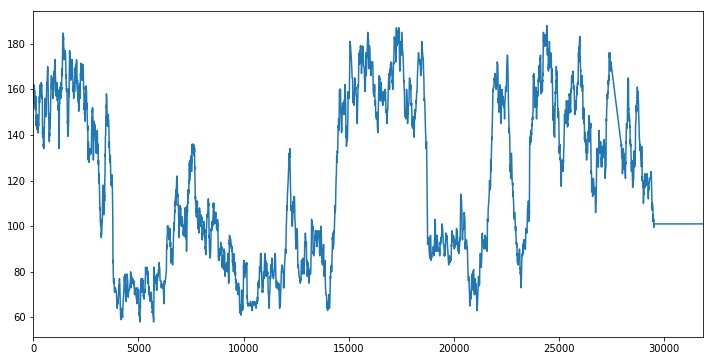

In [10]:
dataset.hr_watch_rate.plot(figsize=(12,6))

In [12]:
print("The amount of missing heart rates is: %d." % dataset.hr_watch_rate.isna().sum())

The amount of missing heart rates is: 0.


There is no missing data, let's look for outliers

In [14]:
dataset = kalman_filter.apply_kalman_filter(dataset, 'hr_watch_rate')

(0.0, 31837.0)

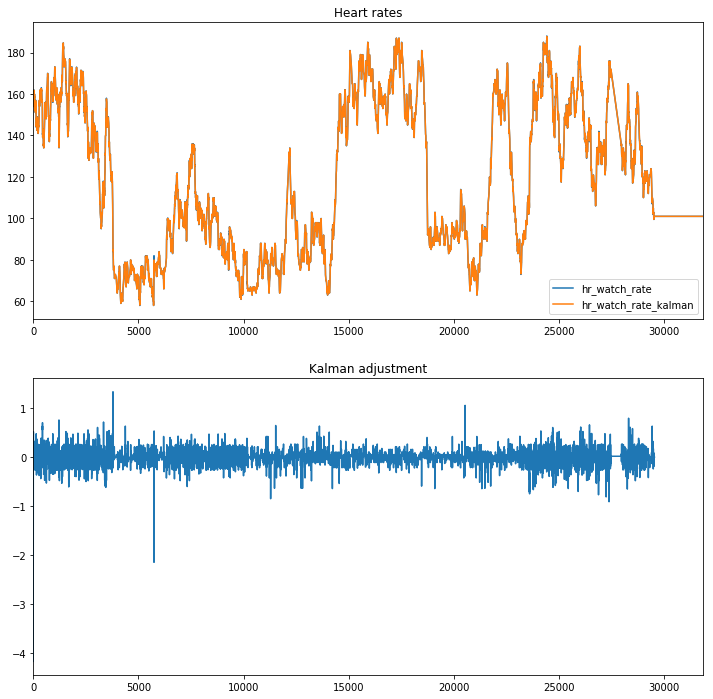

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,12))
dataset.plot(y=['hr_watch_rate', 'hr_watch_rate_kalman'], ax=ax1, title="Heart rates")

tmp = dataset.loc[(dataset.hr_watch_rate_kalman-dataset.hr_watch_rate) != 0]
(tmp.hr_watch_rate_kalman-tmp.hr_watch_rate).plot(ax=ax2, title="Kalman adjustment")
ax2.set_xlim(ax1.get_xlim())

# (dataset.hr_watch_rate_kalman-dataset.hr_watch_rate).plot(ax=ax3, title="Kalman adjustment2")